# MLOps Практическое задание №5

## 1. Создание датасетов

### 1й датасет

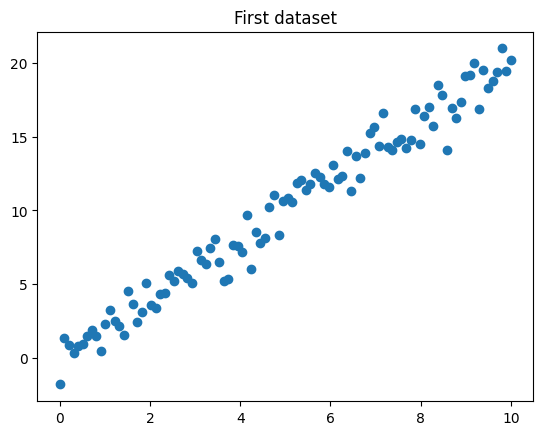

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Датасет 1
xs_1 = np.linspace(0, 10, 100)
ys_1 = 2 * xs_1 + np.random.normal(0, 1, 100)
df_1 = pd.DataFrame(xs_1, columns=['feature'])

plt.scatter(xs_1, ys_1)
plt.title("First dataset")
plt.show()

### Датасет 2

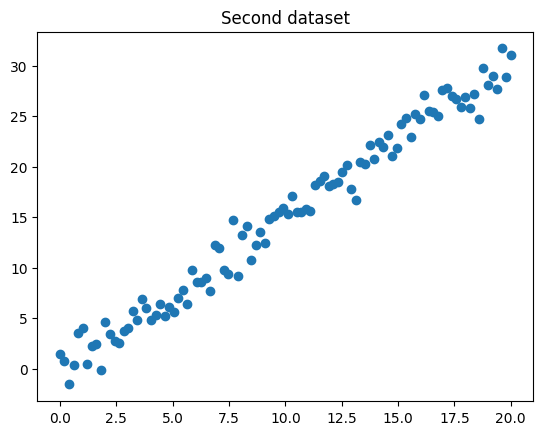

In [3]:
xs_2 = np.linspace(0, 20, 100)
ys_2 = 1.5 * xs_2 + np.random.normal(0, 1.5, 100)
df_2 = pd.DataFrame(xs_2, columns=['feature'])

plt.scatter(xs_2, ys_2)
plt.title("Second dataset")
plt.show()

### Датасет 3

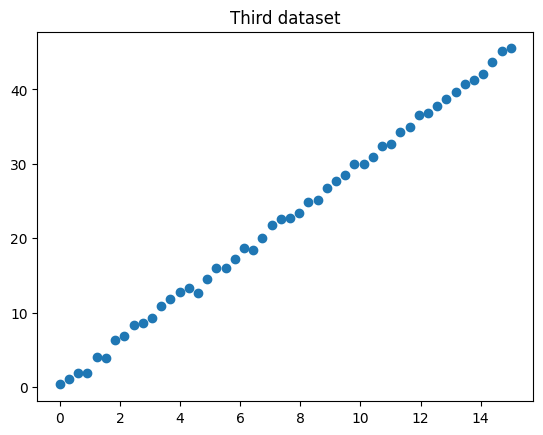

In [4]:
# Датасет 3
xs_3 = np.linspace(0, 15, 50) # Меньше точек
ys_3 = 3 * xs_3 + np.random.normal(0, 0.5, 50)
df_3 = pd.DataFrame(xs_3, columns=['feature'])

plt.scatter(xs_3, ys_3)
plt.title("Third dataset")
plt.show()


### Зашумленный датасет

In [5]:
p_x = np.linspace(0, 100, 100)
p_y  = p_x + np.random.random(100)*20 - 10
p_y[10:30] *= 2
p_y[60:80] /= 2

df_p = pd.DataFrame(p_x, columns=['feature'])


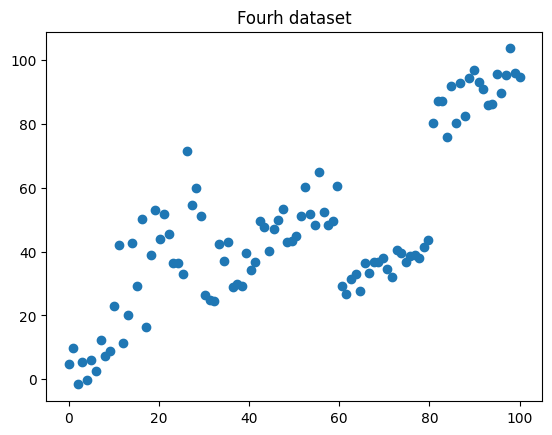

In [6]:
plt.scatter(p_x, p_y)
plt.title("Fourh dataset")
plt.show()


## 2. Обучение Модели Линейной Регрессии

### Обучим модель линейной регрессии на 1 датасете

In [7]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import pickle
import pytest

In [8]:
def process(df, y):
    scaler = StandardScaler()
    X = scaler.fit_transform(df)

    model = LinearRegression()
    model.fit(X, y)
    return model

In [9]:
model = process(df_1, ys_1)


## 3. Сохранение датасетов и модели

In [10]:
pickle.dump(model, open("model.pkl", 'wb'))

df_1.to_csv("df1.csv", index=False)
pd.DataFrame(ys_1, columns=['target']).to_csv("target1.csv", index=False)

df_2.to_csv("df2.csv", index=False)
pd.DataFrame(ys_2, columns=['target']).to_csv("target2.csv", index=False)

df_3.to_csv("df3.csv", index=False)
pd.DataFrame(ys_3, columns=['target']).to_csv("target3.csv", index=False)

df_p.to_csv("dfp.csv", index=False)
pd.DataFrame(p_y, columns=['target']).to_csv("targetp.csv", index=False)



In [11]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

model =  pickle.load(open("model.pkl", 'rb'))
df_1 = pd.read_csv("df1.csv")
df_2 = pd.read_csv("df2.csv")
df_3 = pd.read_csv("df3.csv")
y_1 = pd.read_csv("target1.csv")
y_2 = pd.read_csv("target2.csv")
y_3 = pd.read_csv("target3.csv")

df_p = pd.read_csv("dfp.csv")
y_p = pd.read_csv("targetp.csv")


def get_metrics(target, predictions):
    MAE = mean_absolute_error(target, predictions)
    RMSE = np.sqrt(mean_squared_error(target, predictions))
    return MAE, RMSE


def print_metrics(MAE, RMSE):
    print(f"MAE : {MAE:.4f}")
    print(f"RMSE : {RMSE:.4f}")


def test_second_model():
    print(df_1.shape)
    # get model trained on the first data set - STANDARD
    mae_standard, rmse_standard = get_metrics(y_1, model.predict(df_1))

    mae_2, rmse_2 = get_metrics(y_2, model.predict(df_2))
    assert abs(mae_standard - mae_2) < 1 and abs(rmse_standard - rmse_2) < 1


def test_third_model():
    print(df_1.shape)
    # get model trained on the first data set - STANDARD
    mae_standard, rmse_standard = get_metrics(y_1, model.predict(df_1))

    mae_3, rmse_3 = get_metrics(y_3, model.predict(df_3))
    assert abs(mae_standard - mae_3) < 1 and abs(rmse_standard - rmse_3) < 1


def test_poor_model():
    print(df_1.shape)
    # get model trained on the first data set - STANDARD
    mae_standard, rmse_standard = get_metrics(y_1, model.predict(df_1))

    mae_p, rmse_p = get_metrics(y_p, model.predict(df_p))
    assert abs(mae_standard - mae_p) > 10 and abs(rmse_standard - rmse_p) > 10

In [12]:
preds = model.predict(df_1)
mae, rmse = get_metrics(y_1, preds)
print_metrics(mae, rmse)


MAE : 29.3398
RMSE : 31.4365


c:\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [13]:

preds = model.predict(df_2)
mae, rmse = get_metrics(y_2, preds)
print_metrics(mae, rmse)


MAE : 53.6558
RMSE : 59.3183


c:\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [14]:

preds = model.predict(df_3)
mae, rmse = get_metrics(y_3, preds)
print_metrics(mae, rmse)


MAE : 31.4228
RMSE : 33.8723


c:\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [15]:
preds = model.predict(df_p)
mae, rmse = get_metrics(p_y, preds)
print_metrics(mae, rmse)


MAE : 256.6047
RMSE : 298.3393


c:\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
